### Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import math
import sqlite3 

import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from math import ceil 
from collections import Counter
from scipy.cluster.hierarchy import dendrogram

from sklearn.impute import KNNImputer 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder, RobustScaler
from sklearn.base import clone
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

from pandas_profiling import ProfileReport
from sklearn.metrics import pairwise_distances

import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

### Read the preprocessed Data

In [2]:
df = pd.read_csv('/Users/tomasverissimo/Desktop/Master/1st Year/1st Semester/Data Mining/Project/Project Code/Notebooks/Pre-process/df_pre_processed.csv')

In [3]:
df.head()

,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,AttendedClasses,NumberOfRenewals,NumberOfReferences,Dropout,DaysEnrolled,NumberOfActivities,Regularity
0,60,0,5500.0,1,89.35,0,0,1,0,0,0,0,0,7,0,0,0,58,1,0.155172
1,29,0,2630.0,60,479.20,0,0,0,0,0,0,1,0,1,2,0,1,398,1,0.057789
2,23,1,1980.0,7,37.60,0,0,1,0,0,0,0,0,0,0,0,1,30,1,0.200000
3,9,1,0.0,22,155.40,0,0,0,1,0,0,0,0,2,0,0,1,160,1,0.125000
4,35,1,4320.0,210,373.20,0,0,1,0,0,0,0,0,0,3,0,1,778,1,0.052699


In [4]:
df.dtypes

Age                       int64
Gender                    int64
Income                  float64
DaysWithoutFrequency      int64
LifetimeValue           float64
AthleticsActivities       int64
WaterActivities           int64
FitnessActivities         int64
TeamActivities            int64
RacketActivities          int64
CombatActivities          int64
SpecialActivities         int64
OtherActivities           int64
AttendedClasses           int64
NumberOfRenewals          int64
NumberOfReferences        int64
Dropout                   int64
DaysEnrolled              int64
NumberOfActivities        int64
Regularity              float64
dtype: object

In [5]:
df['CostPerDay'] = df['LifetimeValue']/df['DaysEnrolled']

In [74]:
metric_features = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
                'AttendedClasses', 'NumberOfRenewals',
                   'NumberOfReferences', 'DaysEnrolled', 'NumberOfActivities', 'Regularity', 'CostPerDay']

bin_features = ['Gender', 'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
                'TeamActivities', 'RacketActivities', 'CombatActivities',
                'SpecialActivities', 'OtherActivities', 'Dropout']

In [77]:
df_0 = df[df['Dropout']==0]

In [79]:
df_1 = df[df['Dropout']==1]

## MinMax Scalling

In [7]:
scaler = MinMaxScaler()
df[metric_features] = scaler.fit_transform(df[metric_features])
df.head()

,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,...,SpecialActivities,OtherActivities,AttendedClasses,NumberOfRenewals,NumberOfReferences,Dropout,DaysEnrolled,NumberOfActivities,Regularity,CostPerDay
0,0.689655,0,0.505051,0.002740,0.039301,0,0,1,0,0,...,0,0,0.033816,0.000000,0.0,0,0.026082,0.333333,0.216425,0.153574
1,0.333333,0,0.241506,0.164384,0.210776,0,0,0,0,0,...,1,0,0.004831,0.333333,0.0,1,0.203443,0.333333,0.079945,0.120029
2,0.264368,1,0.181818,0.019178,0.016538,0,0,1,0,0,...,0,0,0.000000,0.000000,0.0,1,0.011476,0.333333,0.279249,0.124945
3,0.103448,1,0.000000,0.060274,0.068353,0,0,0,1,0,...,0,0,0.009662,0.000000,0.0,1,0.079291,0.333333,0.174139,0.096824
4,0.402299,1,0.396694,0.575342,0.164152,0,0,1,0,0,...,0,0,0.000000,0.500000,0.0,1,0.401669,0.333333,0.072812,0.047820


In [8]:
# Checking max and min of minmaxed variables
df[metric_features].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,13447.0,0.29,0.15,0.0,0.23,0.26,0.34,1.0
Income,13447.0,0.20,0.13,0.0,0.14,0.18,0.25,1.0
DaysWithoutFrequency,13447.0,0.19,0.23,0.0,0.04,0.12,0.22,1.0
LifetimeValue,13447.0,0.10,0.11,0.0,0.04,0.06,0.13,1.0
AttendedClasses,13447.0,0.03,0.09,0.0,0.00,0.00,0.00,1.0
NumberOfRenewals,13447.0,0.16,0.19,0.0,0.00,0.17,0.33,1.0
NumberOfReferences,13447.0,0.00,0.03,0.0,0.00,0.00,0.00,1.0
DaysEnrolled,13447.0,0.18,0.18,0.0,0.05,0.12,0.23,1.0
NumberOfActivities,13447.0,0.35,0.07,0.0,0.33,0.33,0.33,1.0
Regularity,13447.0,0.14,0.13,0.0,0.05,0.11,0.19,1.0


### DBScan Outlier Removal

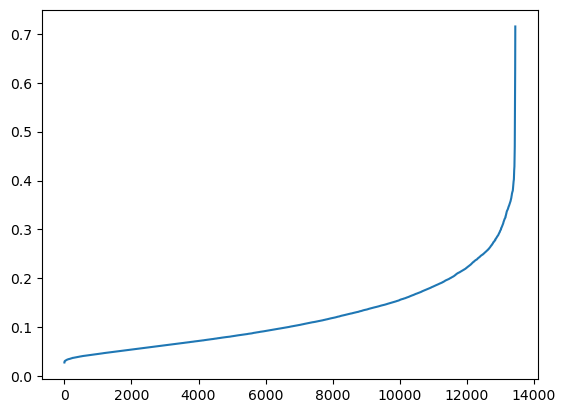

In [11]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(df[metric_features])
distances, _ = neigh.kneighbors(df[metric_features])
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [12]:
# Based on the hyperparameters found in the previous class
dbscan = DBSCAN(eps=0.3, min_samples=20, n_jobs=4)
dbscan_labels = dbscan.fit_predict(df[metric_features])
Counter(dbscan_labels)

Counter({0: 12688, 1: 604, -1: 109, 2: 46})

In [13]:
df = df[dbscan_labels!=-1].copy()

In [14]:
df

,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,...,SpecialActivities,OtherActivities,AttendedClasses,NumberOfRenewals,NumberOfReferences,Dropout,DaysEnrolled,NumberOfActivities,Regularity,CostPerDay
0,0.689655,0,0.505051,0.002740,0.039301,0,0,1,0,0,...,0,0,0.033816,0.000000,0.0,0,0.026082,0.333333,0.216425,0.153574
1,0.333333,0,0.241506,0.164384,0.210776,0,0,0,0,0,...,1,0,0.004831,0.333333,0.0,1,0.203443,0.333333,0.079945,0.120029
2,0.264368,1,0.181818,0.019178,0.016538,0,0,1,0,0,...,0,0,0.000000,0.000000,0.0,1,0.011476,0.333333,0.279249,0.124945
3,0.103448,1,0.000000,0.060274,0.068353,0,0,0,1,0,...,0,0,0.009662,0.000000,0.0,1,0.079291,0.333333,0.174139,0.096824
4,0.402299,1,0.396694,0.575342,0.164152,0,0,1,0,0,...,0,0,0.000000,0.500000,0.0,1,0.401669,0.333333,0.072812,0.047820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13442,0.241379,0,0.167126,0.208219,0.054761,0,0,0,0,0,...,0,0,0.000000,0.333333,0.0,1,0.147626,0.333333,0.056749,0.042651
13443,0.160920,1,0.000000,0.005479,0.642380,0,1,0,0,0,...,0,0,0.463768,0.500000,0.0,0,0.594679,0.333333,0.135684,0.126822
13444,0.448276,1,0.328375,0.104110,0.151243,0,0,0,0,0,...,0,0,0.000000,0.000000,0.0,1,0.131977,0.333333,0.305023,0.131335
13445,0.229885,1,0.166208,0.005479,0.019177,0,0,1,0,0,...,0,0,0.000000,0.000000,0.0,1,0.011476,0.333333,0.279249,0.144883


### Defining Perspetives

In [81]:
df_0 = df[df['Dropout']==0]

In [82]:
df_1 = df[df['Dropout']==1]

In [86]:
# Split variables into perspectives 
# (example, requires critical thinking and domain knowledge)
demographic_features = [
    'Age',
    'Gender',
    'Income',
    'CostPerDay',
]    
    #'NumberOfFrequencies', 
    #'NumberOfRenewals',
    #'NumberOfReferences', 
    #'Dropout',
    #'DaysEnrolled',
    #'Regularity'
#]


#activities_features = [
#    'AthleticsActivities',
#   'WaterActivities',
#   'TeamActivities',
 #  'CombatActivities',
  #  'SpecialActivities',
  #  'OtherActivities',
  #  'AttendedClasses',
   # 'NumberOfActivities'
#]

membership_features = [ 
    'AttendedClasses', 
    'NumberOfRenewals',
    'NumberOfReferences', 
    'NumberOfActivities', 
    'Dropout',
    'DaysEnrolled',
    'Regularity'
]
# In the case of non-dropout
df_0_dem = df_0[demographic_features].copy()
#df_act = df_standard[activities_features].copy()
df_0_member = df_0[membership_features].copy()

# In the case of dropout
df_1_dem = df_1[demographic_features].copy()
#df_act = df_standard[activities_features].copy()
df_1_member = df_1[membership_features].copy()

In [87]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust


# Set up the clusterers
kmeans = KMeans(
    init='k-means++',
    n_init=20,
    random_state=42
)

hierarchical = AgglomerativeClustering(
    metric='euclidean'
)

## Dropout = 0

In [88]:
# Obtaining the R² scores for each cluster solution on demographic variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_0_dem, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_0_dem, hierarchical.set_params(linkage=linkage)
    )

pd.DataFrame(r2_scores)

,kmeans,complete,average,single,ward
2,0.779955,0.779955,0.779955,0.779955,0.779955
3,0.865488,0.864598,0.782789,0.780423,0.863552
4,0.903609,0.902441,0.863234,0.780964,0.897970
5,0.929689,0.905439,0.898703,0.781595,0.918774
6,0.945245,0.915319,0.899003,0.782532,0.936506
7,0.952756,0.916780,0.899893,0.784573,0.947458
8,0.957288,0.921258,0.902246,0.784975,0.952456
9,0.960197,0.924124,0.902683,0.785221,0.956323


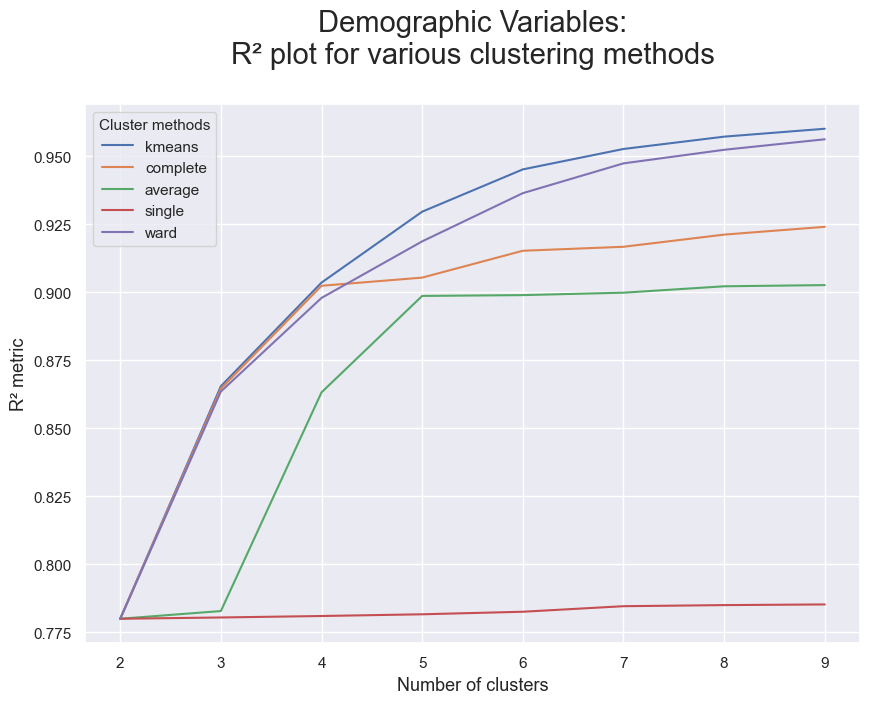

In [90]:
# Visualizing the R² scores for each cluster solution on demographic variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Demographic Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

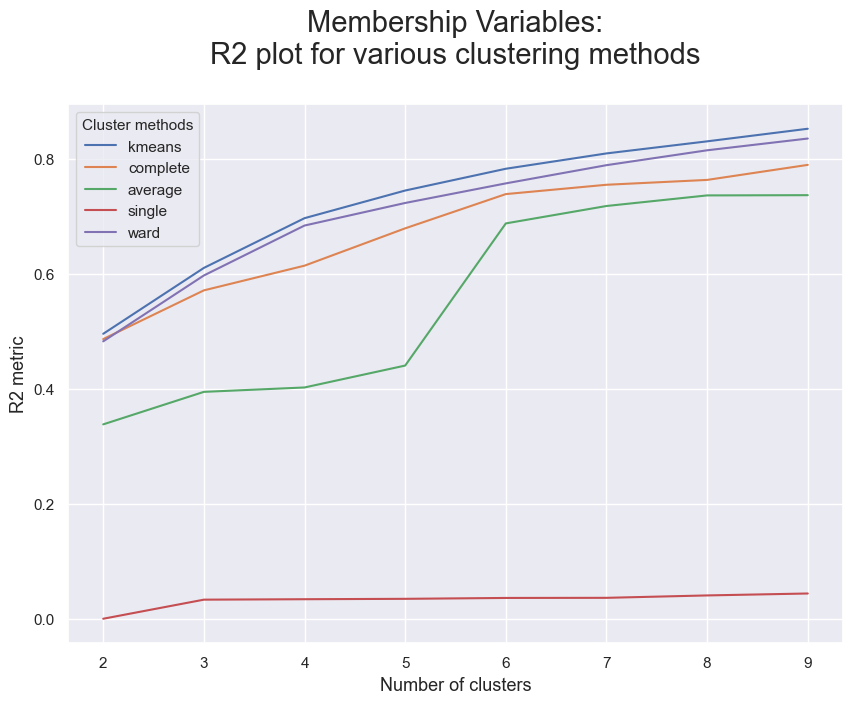

In [92]:

# Obtaining the R² scores for each cluster solution on product variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_0_member, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_0_member, hierarchical.set_params(linkage=linkage)
    )
# Visualizing the R² scores for each cluster solution on product variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Membership Variables:\nR2 plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)
plt.show()



### Merging Perspectives

In [93]:
# Applying the right clustering (algorithm and number of clusters) for each perspective
kmeans_0_member = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=20,
    random_state=42
)
member_labels_0 = kmeans_0_member.fit_predict(df_0_member)

kmeans_0_dem = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=20,
    random_state=42
)
dem_labels_0 = kmeans_0_dem.fit_predict(df_0_dem)

df['member_labels_0'] = member_labels_0
df['demographic_labels_0'] = dem_labels_0

ValueError: Length of values (2097) does not match length of index (13338)

In [26]:
# Count label frequencies (contigency table)

pd.crosstab(df['demographic_labels_0'],
            df['member_labels_0'])

member_labels,0,1,2
demographic_labels,,,
0,803,3069,1308
1,282,972,373
2,1012,4198,1321


In [53]:
# Centroids of clusters
df_centroids = df.groupby(['demographic_labels', 'member_labels'])\
    [metric_features].mean()


# Clusters with low freq uency to be merged:
# (behavior_labels, product_labels)
to_merge = [(0,0), (1,0), (1,1), (1,2)]


# Computing the euclidean distance matrix between the centroids
euclidean = pairwise_distances(df_centroids)
df_dists = pd.DataFrame(
    euclidean, columns=df_centroids.index, index=df_centroids.index
)

# Merging each low frequency clustering (source) to the closest cluster (target)
source_target = {}
for clus in to_merge:
    if clus not in source_target.values():
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target

{(0, 0): (2, 0), (1, 0): (1, 1), (1, 2): (0, 2)}

In [54]:
df_ = df.copy()

# Changing the behavior_labels and product_labels based on source_target
for source, target in source_target.items():
    mask = (df_['demographic_labels']==source[0]) & (df_['member_labels']==source[1])
    df_.loc[mask, 'demographic_labels'] = target[0]
    df_.loc[mask, 'member_labels'] = target[1]

# New contigency table

pd.crosstab(df['demographic_labels'],
            df['member_labels'])

member_labels,0,1,2
demographic_labels,,,
0,803,3069,1308
1,282,972,373
2,1012,4198,1321


In [55]:
# Assuming df_ is your dataframe and 'member_labels' is the column with cluster labels
# First, calculate the cluster sizes
cluster_sizes = df_['member_labels'].value_counts()

# Identify clusters with less than 300 observations
small_clusters = cluster_sizes[cluster_sizes < 1000].index

# Decide on a merge target for small clusters
# This could be the largest cluster, or you might have a more complex logic
# For simplicity, let's merge into the largest cluster
largest_cluster = cluster_sizes.idxmax()

# Create a new column for updated labels
df_['updated_member_labels'] = df_['member_labels']

# Iterate over the small clusters and update their labels
for cluster in small_clusters:
    df_.loc[df_['member_labels'] == cluster, 'updated_member_labels'] = largest_cluster

# Now you can create a new contingency table with the updated labels
pd.crosstab(df_['demographic_labels'], df_['updated_member_labels'])

updated_member_labels,0,1,2
demographic_labels,,,
0,0,3069,1681
1,0,1254,0
2,1815,4198,1321


In [56]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=7
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

Age    Income  DaysWithoutFrequency  \
demographic_labels member_labels                                             
0                  0              0.239375  0.160309              0.057098   
                   1              0.293233  0.202129              0.184304   
                   2              0.284949  0.194122              0.246010   
1                  0              0.566601  0.428431              0.085272   
                   1              0.519737  0.398433              0.202824   
                   2              0.520477  0.387407              0.258776   
2                  0              0.182227  0.114132              0.060599   
                   1              0.249191  0.163726              0.209656   
                   2              0.238395  0.150090              0.259380   

                                  LifetimeValue  AttendedClasses  \
demographic_labels member_labels                                   
0                  0                   0.179819         0.083425   
                   1                   0.064503         0.011445   
                   2                   0.181304         0.050396   
1                  0                   0.128749         0.044283   
                   1                   0.069491         0.010884   
                   2                   0.181253         0.052402   
2                  0                   0.162362         0.084412   
                   1                   0.055190         0.010286   
                   2                   0.168672         0.059185   

                                  NumberOfRenewals  NumberOfReferences  \
demographic_labels member_labels                                         
0                  0                      0.257783            0.000000   
                   1                      0.054958            0.000760   
                   2                      0.393858            0.003568   
1                  0                      0.203310            0.000000   
                   1                      0.062243            0.000000   
                   2                      0.394996            0.000000   
2                  0                      0.227602            0.000329   
                   1                      0.056852            0.001270   
                   2                      0.399697            0.002019   

                                  DaysEnrolled  NumberOfActivities  \
demographic_labels member_labels                                     
0                  0                  0.258073            0.347032   
                   1                  0.093565            0.346584   
                   2                  0.376136            0.360601   
1                  0                  0.202638            0.340426   
                   1                  0.094019            0.347394   
                   2                  0.344145            0.352994   
2                  0                  0.226516            0.344862   
                   1                  0.092129            0.343418   
                   2                  0.378004            0.361342   

                                  Regularity  CostPerDay  hclust_labels  
demographic_labels member_labels                                         
0                  0                0.171303    0.108930              6  
                   1                0.154419    0.089457              1  
                   2                0.111239    0.062002              0  
1                  0                0.202849    0.116844              5  
                   1                0.137051    0.097570              3  
                   2                0.117930    0.067560              4  
2                  0                0.162049    0.117879              2  
                   1                0.137902    0.079887              1  
                   2                0.100848    0.057170              0

In [57]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = df.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['demographic_labels'], row['member_labels'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels').mean()[metric_features]

,Age,Income,DaysWithoutFrequency,LifetimeValue,AttendedClasses,NumberOfRenewals,NumberOfReferences,DaysEnrolled,NumberOfActivities,Regularity,CostPerDay
merged_labels,,,,,,,,,,,
0,0.261557,0.171997,0.252728,0.174957,0.054812,0.396792,0.002789,0.377075,0.360974,0.106018,0.059574
1,0.267791,0.179944,0.198949,0.059123,0.010775,0.056052,0.001055,0.092735,0.344755,0.144877,0.083928
2,0.182227,0.114132,0.060599,0.162362,0.084412,0.227602,0.000329,0.226516,0.344862,0.162049,0.117879
3,0.519737,0.398433,0.202824,0.069491,0.010884,0.062243,0.000000,0.094019,0.347394,0.137051,0.097570
4,0.520477,0.387407,0.258776,0.181253,0.052402,0.394996,0.000000,0.344145,0.352994,0.117930,0.067560
5,0.566601,0.428431,0.085272,0.128749,0.044283,0.203310,0.000000,0.202638,0.340426,0.202849,0.116844
6,0.239375,0.160309,0.057098,0.179819,0.083425,0.257783,0.000000,0.258073,0.347032,0.171303,0.108930


### Cluster Analysis

In [58]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

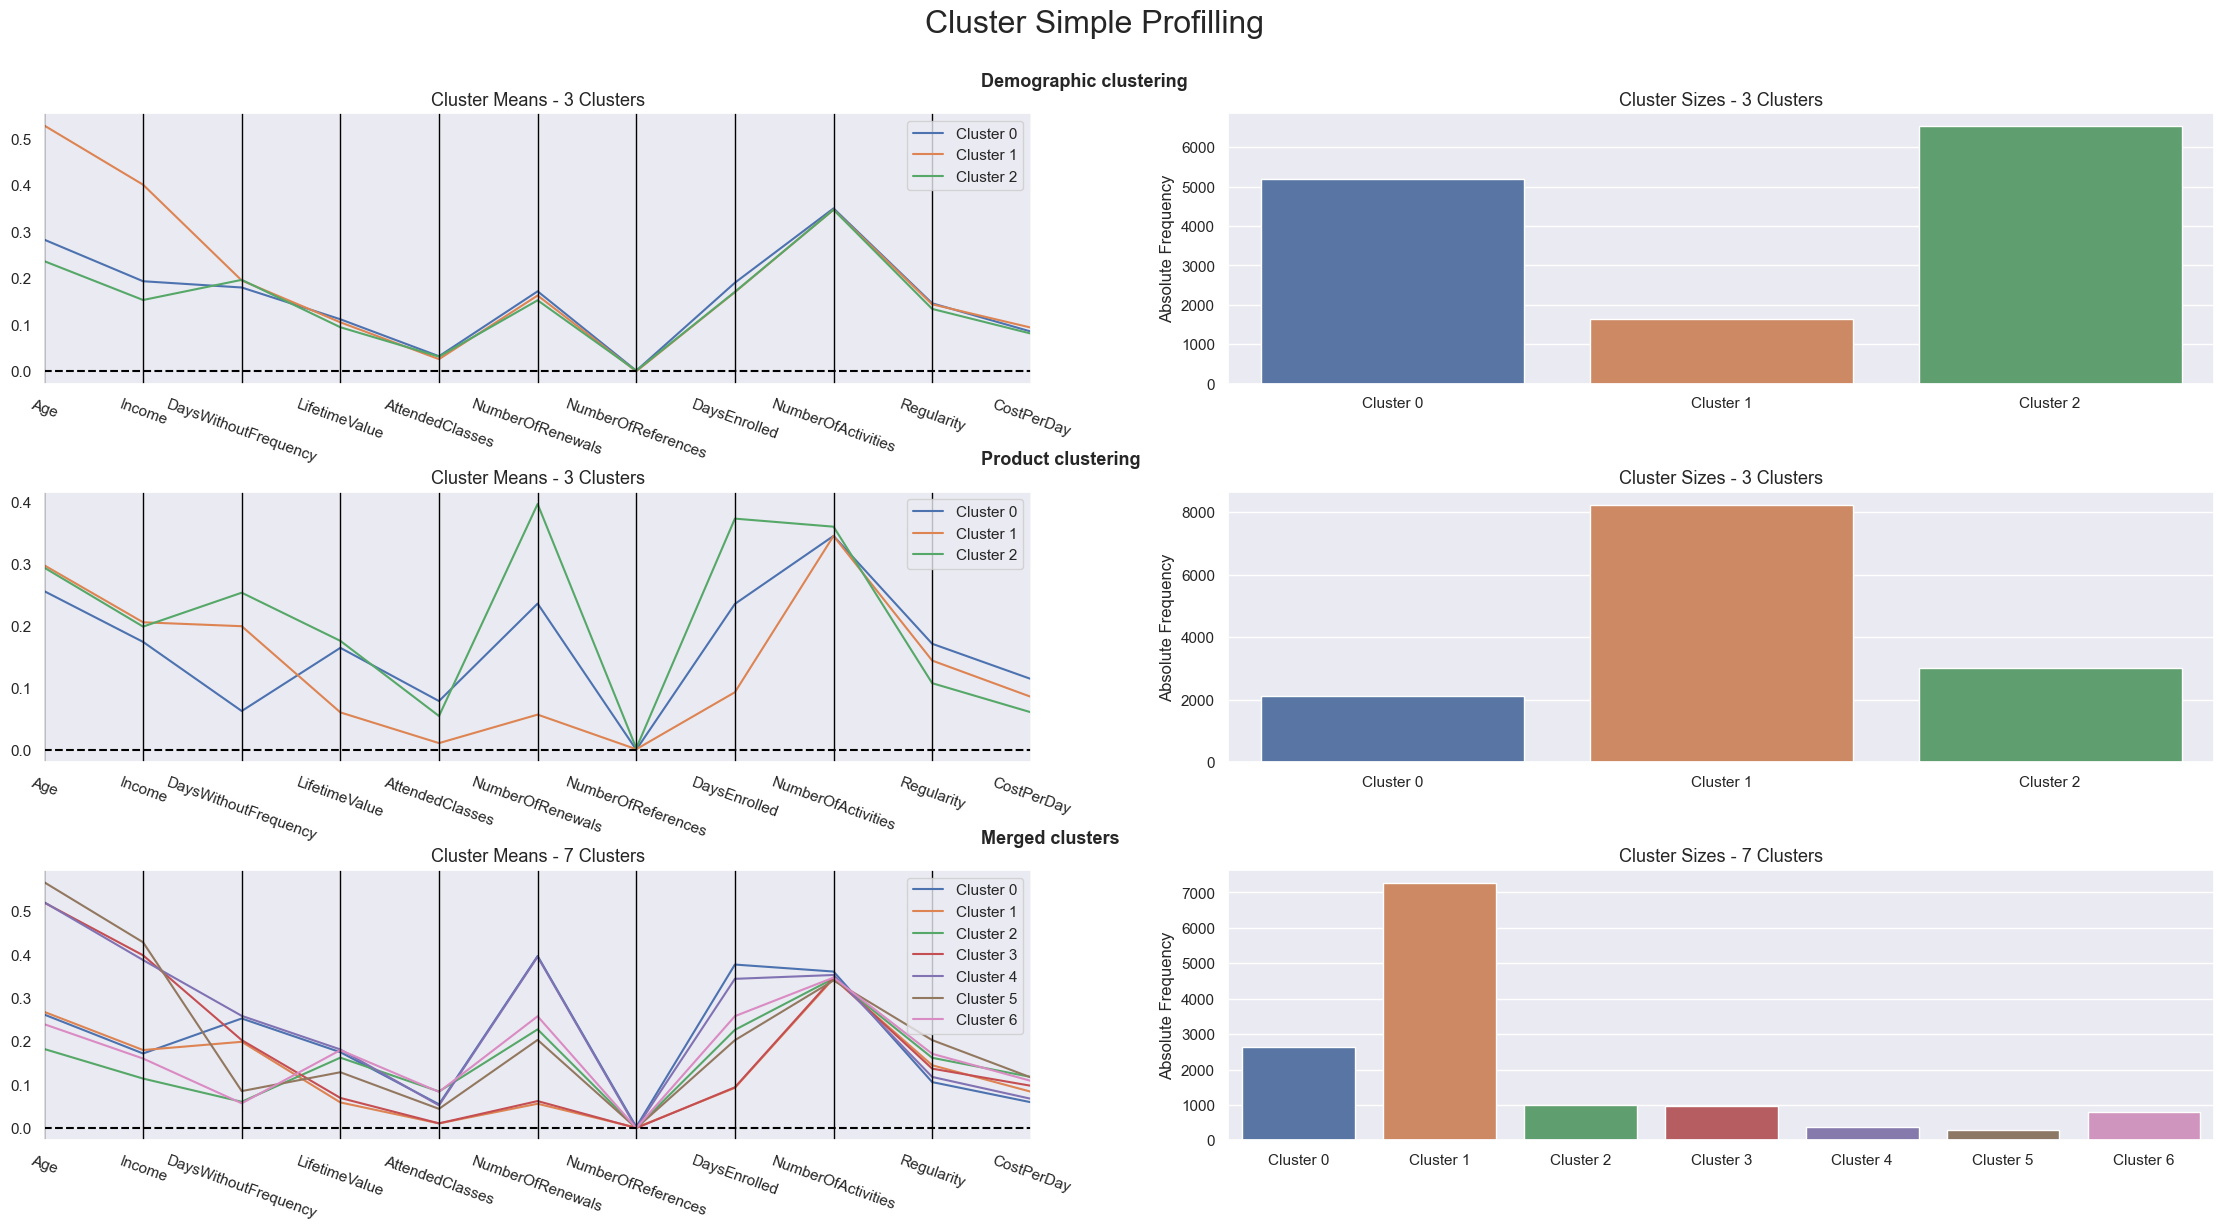

In [59]:
# Profilling each cluster (behavior, member, merged)
cluster_profiles(
    df = df_[metric_features + ['demographic_labels', 'member_labels', 'merged_labels']], 
    label_columns = ['demographic_labels', 'member_labels', 'merged_labels'], 
    figsize = (28, 13), 
    compar_titles = ["Demographic clustering", "Product clustering", "Merged clusters"]
)

### Merging with the non_metric

In [62]:
bin_features

['Gender',
 'AthleticsActivities',
 'WaterActivities',
 'FitnessActivities',
 'TeamActivities',
 'RacketActivities',
 'CombatActivities',
 'SpecialActivities',
 'OtherActivities',
 'Dropout']

In [65]:
df_activities = df_[['merged_labels',
              'AthleticsActivities', 
              'WaterActivities', 
              'FitnessActivities',
                'TeamActivities',
                'RacketActivities',
                    'CombatActivities',
                    'SpecialActivities'
                ]].groupby(['merged_labels']).sum()

df_activities

,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities
merged_labels,,,,,,,
0,12,906,1420,168,38,277,26
1,40,1396,4716,280,201,835,42
2,2,522,410,42,0,69,2
3,4,214,691,10,14,40,31
4,3,107,257,2,7,13,5
5,0,72,204,2,0,10,0
6,0,387,315,45,0,89,0


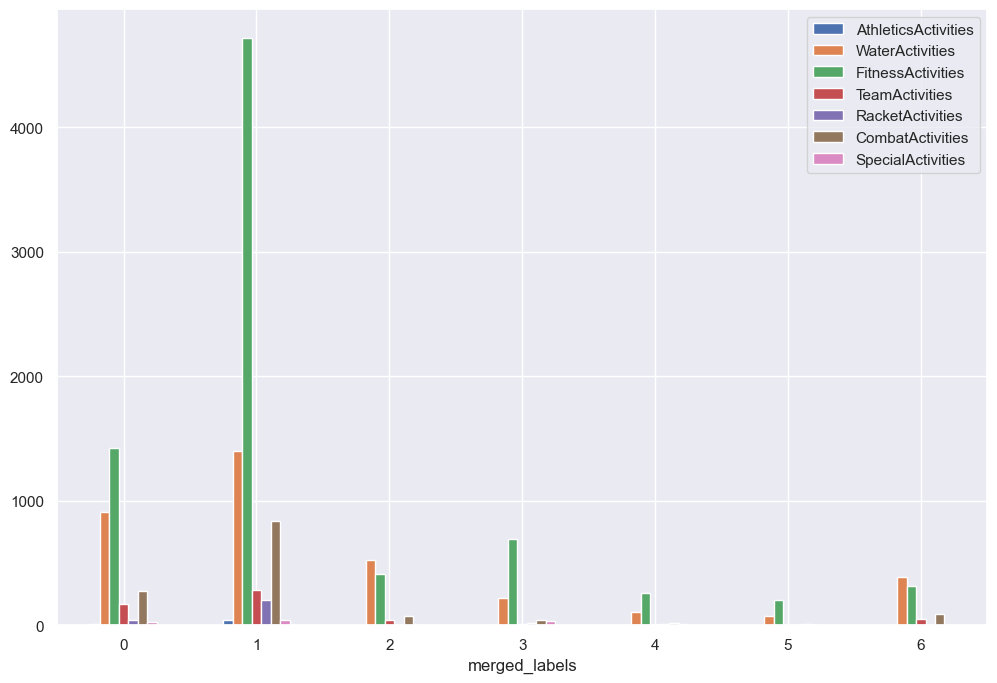

In [67]:
fig, ax = plt.subplots(figsize=(12,8))
df_activities.plot(kind='bar', stacked=False, ax=ax)
plt.xticks(rotation=0)
plt.show()

In [69]:
df_dropout = df_[['merged_labels',
              'Dropout'
                ]].groupby(['merged_labels']).sum()
df_dropout

,Dropout
merged_labels,
0,2629
1,7267
2,0
3,972
4,373
5,0
6,0


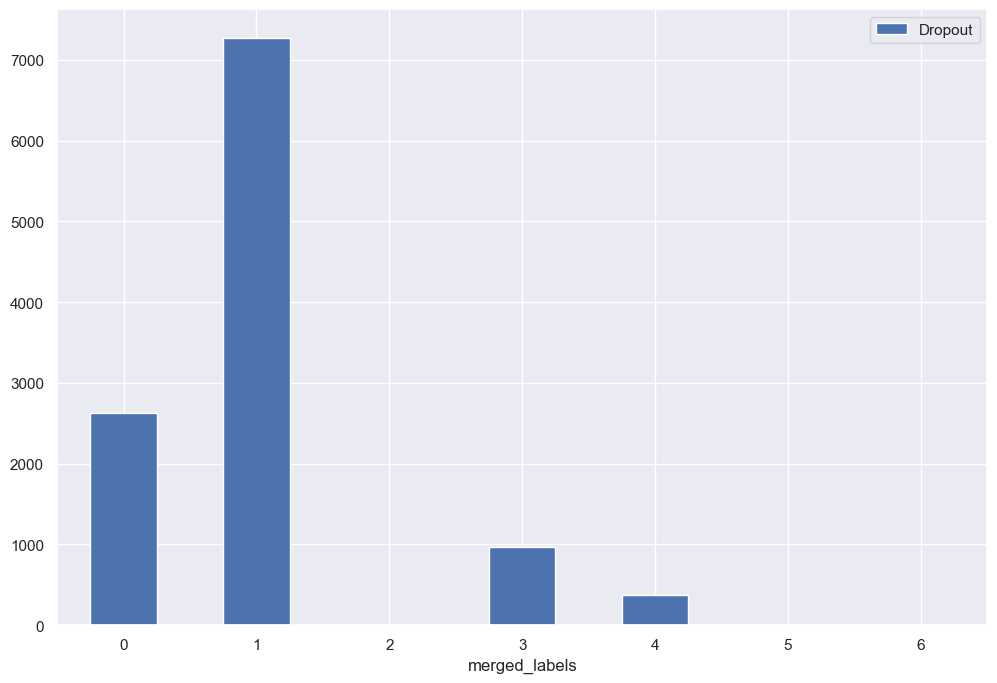

In [70]:
fig, ax = plt.subplots(figsize=(12,8))
df_dropout.plot(kind='bar', stacked=False, ax=ax)
plt.xticks(rotation=0)
plt.show()

In [71]:
# This is step can be quite time consuming
two_dim = TSNE(random_state=42).fit_transform(df[metric_features])

locator: <matplotlib.ticker.AutoLocator object at 0x16c739910>


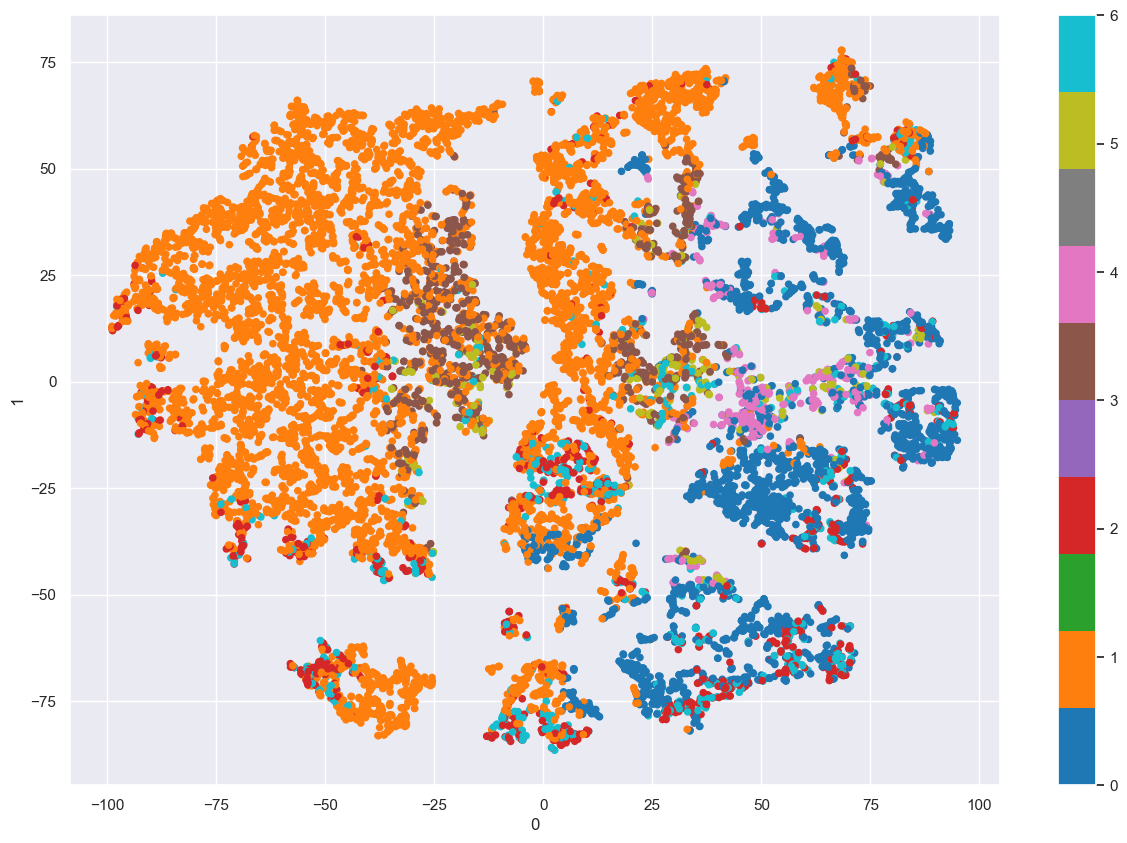

In [73]:
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df_['merged_labels'], colormap='tab10', figsize=(15,10))
plt.show()